## Identifying Instances of Financial Excess in BPD Spending

Looking at 2021-2022 Earnings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

#loading the relative data for the deliverable 1 questions to answer
earnings_2021 = pd.read_csv('../data/Earnings/employee-earnings-report-2021.csv', encoding='ISO-8859-1')
earnings_2022 = pd.read_csv('../data/Earnings/finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv')
overtime_2021 = pd.read_csv('../data/Overtime/2021_Details.xlsx - _2021_Detals.csv')
overtime_2022 = pd.read_csv('../data/Overtime/2022_Detail_through_Paid_Date_08-26-2022.xlsx - _2022_Detals.csv')


Earnings_2021 head

In [2]:
earnings_2021.head(10)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION_INCENTIVE,TOTAL_GROSS,POSTAL
0,"Beckers,Richard",Boston Police Department,Police Officer,NaN,NaN,"1,264,843.63",NaN,NaN,NaN,NaN,"1,264,843.63",02119
1,"McGowan,Jacqueline M.",Boston Police Department,Police Officer,NaN,NaN,"1,252,990.81",NaN,NaN,NaN,NaN,"1,252,990.81",02129
2,"Harris,Shawn N",Boston Police Department,Police Offc Comm Serv Offc 3$8,"69,772.10",NaN,"212,739.48","82,300.87","30,939.24","12,144.00","25,178.06","433,073.75",02130
3,"Washington,Walter",Boston Police Department,Police Officer,"100,963.38",NaN,"211,900.28","67,849.66",NaN,"9,016.00","10,096.55","399,825.87",02368
4,"Mosley Jr.,Curtis",Boston Police Department,Police Offc Comm Serv Offc 3$8,"109,858.02",NaN,"192,097.54","75,938.65",NaN,"19,550.00",NaN,"397,444.21",02301
5,"Joseph,Martin M",Boston Police Department,Police Sergeant (Det),"127,626.76",NaN,"124,524.50","66,433.83",NaN,"50,085.00","12,762.78","381,432.87",02124
6,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"142,466.41",NaN,"15,820.50","167,509.61",NaN,"24,695.00","28,198.49","378,690.01",02052
7,"Smith,Sean P",Boston Police Department,Police Lieutenant,"143,566.78",NaN,"16,789.43","109,101.43",NaN,"53,240.00","35,891.85","358,589.49",02186
8,"Lee,Waiman",Boston Police Department,Police Detective,"107,352.54",NaN,"16,324.27","76,434.46",NaN,"123,234.00","26,838.11","350,183.38",02134
9,"Barrett,Thomas E.",Boston Police Department,Police Sergeant (Det),"130,930.12",NaN,"16,723.95","166,042.24",NaN,NaN,"32,732.73","346,429.04",02132


Earnings_2022 head

In [3]:
earnings_2022.head(10)

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
1,"Cassellius,Brenda",Superintendent,Superintendent,"179,109.61",NaN,"417,839.83",NaN,NaN,NaN,NaN,"596,949.44",55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),"133,653.78",NaN,"312,752.53",NaN,NaN,NaN,NaN,"446,406.31",02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186
5,"McCormick,Kelley J",Boston Police Department,Police Captain,"147,690.64",NaN,"7,452.73","83,593.06","16,410.06","78,060.00","41,025.08","374,231.57",02476
6,"Long,Gregory P",Boston Police Department,Supn-In Chief,"290,703.31",NaN,"30,244.46",NaN,NaN,NaN,"52,180.57","373,128.34",02021
7,"Danilecki,John H",Boston Police Department,Police Captain,"164,100.70",NaN,"24,504.13","71,315.48",NaN,"61,200.00","41,025.08","362,145.39",02559
8,"Webb,Keith A",Boston Police Department,Police Sergeant (Det),"130,930.12",NaN,"19,722.83","134,229.14",NaN,"37,312.00","32,732.72","354,926.81",02121
9,"McMahon,Joseph G",Boston Fire Department,Chief of Support Services,"146,502.16",NaN,"208,058.56",NaN,NaN,NaN,NaN,"354,560.72",02492


Overtime_2021 head

In [4]:
overtime_2021.head(10)

,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\r\nDate,Start\r\nTime,End \r\nTime,Hours\r\nWorked,Hours\r\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2343189,140298,"GARNEY,BRIAN",9,NEW CHARDON ST,NaN,1/2/2021,700,800,100,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
1,2343190,10264,"GAVA,ROY",9,NEW CHARDON ST,NaN,1/2/2021,700,800,100,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
2,2338683,9707,"BOYLE,FREDERICK J",9,LOMASNEY WY,NaN,1/2/2021,700,1200,500,8,C,2602,TISHMAN CONSTRUCTION CORP,1 FEDERAL ST FL 8,NaN,NaN,BOSTON,MA,02110
3,2340857,116235,"JOSEPH,GREGORY",9,LONGWOOD AV,NaN,1/1/2021,800,1530,730,8,S,151,CHILDREN'S HOSPITAL BOSTON,300 LONGWOOD AVENUE,"ATTN:BOB RYAN,SECURITY DEPT",NaN,BOSTON,MA,02115
4,2343951,12253,"BUTLER,BOBBIE",9,BLUE HILL AV,NaN,1/1/2021,900,1500,600,8,C,396,NATIONAL GRID,40 SYLVAN ROAD,ATTN: MARY MULRONEY,NaN,WALTHAM,MA,02451
5,2343950,10441,"PHILLIPS,MYRON W",9,BLUE HILL AV,NaN,1/1/2021,900,1500,600,8,C,396,NATIONAL GRID,40 SYLVAN ROAD,ATTN: MARY MULRONEY,NaN,WALTHAM,MA,02451
6,2340858,103757,"GODIN,DAVID",9,LONGWOOD AV,NaN,1/1/2021,1600,2345,745,8,S,151,CHILDREN'S HOSPITAL BOSTON,300 LONGWOOD AVENUE,"ATTN:BOB RYAN,SECURITY DEPT",NaN,BOSTON,MA,02115
7,2338666,94734,"JONES-HENDERSON,LYLANA",9,BLUE HILL AV,NaN,1/2/2021,700,1200,500,5,S,99164,STOP & SHOP,C/O ASSET PROTECTION DEPARTMENT,P.O. BOX 249,1149 HARRISBURG PIKE,CARLISLE,PA,17013
8,2338646,126186,"O'BRIEN,JAMES GERARD",9,FRANCIS ST,NaN,1/2/2021,830,1530,700,8,S,149,BRIGHAM & WOMEN'S HOSPITAL,"10 VINING STREET, ROOM 103",SECURITY DEPT; ATTN: KARL SKULTE,NaN,BOSTON,MA,02115
9,2338651,103757,"GODIN,DAVID",9,HUNTINGTON AV,NaN,1/2/2021,1600,2345,745,8,S,93991,MISSION PARK,835 HUNTINGTON AVE,C/O ASUNCION VELEZ,NaN,BOSTON,MA,02115


Overtime_2022 head

In [5]:
overtime_2022.head(10)

,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\r\nDate,Start\r\nTime,End \r\nTime,Hours\r\nWorked,Hours\r\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2495612,148321,"ZOU,ZI",9,CAMBRIDGE ST,NaN,1/2/2022,900,1500,600,8,C,97297,EVERSOURCE ELECTRIC,247 STATION DRIVE,ATTN: JIM DEVEREAUX SUM-NE310,NaN,WESTWOOD,MA,02090
1,2492668,10310,"WALLACE,DANIEL A",9,NEW CHARDON ST,NaN,1/3/2022,300,700,400,4,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
2,2492614,162972,"ERCOLANO,SEAN ANTHONY",9,LEGENDS WAY,NaN,1/2/2022,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
3,2492609,135924,"LIZARDO,STEVEN",9,LEGENDS WAY,NaN,1/2/2022,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
4,2492604,135959,"LAMBERT,STEVEN R",9,LEGENDS WAY,NaN,1/2/2022,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
5,2492599,10264,"GAVA,ROY",9,LEGENDS WAY,NaN,1/2/2022,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
6,2492607,111241,"MUSTACCHIO,MICHAEL ANTHONY",9,LEGENDS WAY,NaN,1/2/2022,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
7,2492608,157678,"ROONEY,CHRISTOPHER",9,LEGENDS WAY,NaN,1/2/2022,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
8,2492603,144421,"BURKE,SEAN",9,LEGENDS WAY,NaN,1/2/2022,1600,2230,630,8,S,7587,TD GARDEN,100 LEGENDS WAY,NaN,NaN,BOSTON,MA,02114
9,2492513,103757,"GODIN,DAVID",9,LONGWOOD AV,NaN,1/1/2022,730,1530,800,8,S,151,CHILDREN'S HOSPITAL BOSTON,300 LONGWOOD AVENUE,"ATTN:BOB RYAN,SECURITY DEPT",NaN,BOSTON,MA,02115


Now that we have successfully loaded in all the data and examined the structure of all the df. we can proceed with

# How has the BPD budget changed year-over-year?

lets approach this question by calculating the gross pay for BPD in 2021 and 2022

In [6]:
# Convert 'TOTAL_GROSS' columns to float for both datasets
earnings_2021['TOTAL_GROSS'] = earnings_2021['TOTAL_GROSS'].str.replace(',', '').astype(float)
earnings_2022['TOTAL_ GROSS'] = earnings_2022['TOTAL_ GROSS'].str.replace(',', '').astype(float)

# Calculate the total gross pay for BPD in 2021 and 2022
total_gross_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department']['TOTAL_GROSS'].sum()
total_gross_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department']['TOTAL_ GROSS'].sum()

total_gross_2021, total_gross_2022


(408762469.35, 405823059.81)

from this we can analyze that:
2021: $408,762,469.35 and
2022: $405,823,059.81

now, lets calcualte the year-over-year change to determine how the BPD budget has changed between these two years.

In [7]:
# Calculate year-over-year change in total gross pay
year_over_year_change = total_gross_2022 - total_gross_2021

# Calculate percentage change
percentage_change = (year_over_year_change / total_gross_2021) * 100

year_over_year_change, percentage_change


(-2939409.5400000215, -0.7190996631060991)

The Boston Police Department's budget saw a decrease of approximately $2,939,409.54 from 2021 to 2022, which represents a -0.72% year-over-year change.

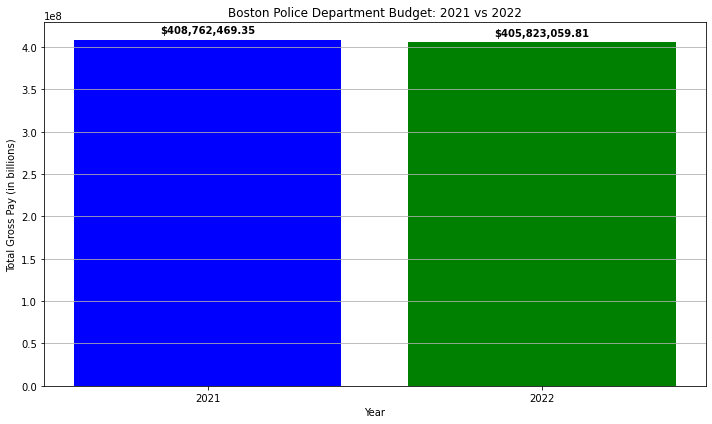

In [8]:
import matplotlib.pyplot as plt

# Data for plotting
years = ['2021', '2022']
total_gross_values = [total_gross_2021, total_gross_2022]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(years, total_gross_values, color=['blue', 'green'])
plt.title('Boston Police Department Budget: 2021 vs 2022')
plt.xlabel('Year')
plt.ylabel('Total Gross Pay (in billions)')
plt.grid(axis='y')

# Annotating the bars with the exact values
for i, v in enumerate(total_gross_values):
    plt.text(i, v + 5000000, f"${v:,.2f}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


The bar chart above illustrates the Boston Police Department's budget for the years 2021 and 2022. As depicted:

In 2021, the total gross pay (essentially the budget) was approximately $408,762,469.35.
In 2022, this decreased to approximately $405,823,059.81.
This visual representation corroborates our earlier findings: the BPD budget saw a slight decline from 2021 to 2022.



-----------------------------------------------------


# Where have funds grown or shrunk, overall and intra-departmentally?

1. lets first identify the department within BPD.
2. for each department, calculate the total gross pay for 2021 and 2022
3. determine where funds have grown or shrunk

the data is primarly dividied by titles of police ranking rather than smaller departments within BPD. thus we will analyze the funds based on thee titles.

In [9]:
# Group by title and sum the gross pay for 2021 and 2022
grouped_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department'].groupby('TITLE')['TOTAL_GROSS'].sum()
grouped_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department'].groupby('TITLE')['TOTAL_ GROSS'].sum()

# Merge the two series to create a dataframe for comparison
title_comparison = pd.DataFrame({'2021': grouped_2021, '2022': grouped_2022}).reset_index()

def convert_to_float(val):
    try:
        # Convert string to float after removing commas
        return float(val.replace(',', ''))
    except:
        return 0.0

# Convert '2021' and '2022' columns to float
title_comparison['2021'] = title_comparison['2021'].apply(lambda x: sum([convert_to_float(val) for val in str(x).split()]))
title_comparison['2022'] = title_comparison['2022'].apply(convert_to_float)


# check the data types and first few rows
data_types = title_comparison.dtypes
sample_data = title_comparison.head()

data_types, sample_data


(TITLE     object
 2021     float64
 2022     float64
 dtype: object,
                             TITLE       2021  2022
 0                      Admin Asst  288361.04   0.0
 1             Admin Asst (Police)        NaN   0.0
 2  Admin Asst/EvidencTechncn(BPD)  130497.52   0.0
 3                 Admin Secretary   67445.06   0.0
 4  AssocDir,BPDOfficeofReas&Devel  110968.79   0.0)

In [10]:
title_comparison['Difference'] = title_comparison['2022'] - title_comparison['2021']
title_comparison['Percentage Change (%)'] = (title_comparison['Difference'] / title_comparison['2021']) * 100

# Sort the dataframe by the difference
title_comparison_sorted = title_comparison.sort_values(by='Difference', ascending=False)

title_comparison_sorted

,TITLE,2021,2022,Difference,Percentage Change (%)
60,Employment Agreement,13860.00,0.0,-13860.00,-100.0
191,Video Forensic Analyst,46396.41,0.0,-46396.41,-100.0
41,Digital Video Technician,52123.77,0.0,-52123.77,-100.0
153,Public Relations Rep(Bpd),52220.49,0.0,-52220.49,-100.0
83,Legal Secretary,58006.36,0.0,-58006.36,-100.0
...,...,...,...,...,...
64,Evidence Technician Supervisor,NaN,0.0,NaN,NaN
87,Lieut. Supv of Court Cases,NaN,0.0,NaN,NaN
88,Mailroom Equipment Operator,NaN,0.0,NaN,NaN
94,Motor Equip Repprs ClassIIIBPD,NaN,0.0,NaN,NaN


the 'difference' column quantifies the change in gross pay between the two years for each title. A positive value indicates an increase in gross pay in 2022 compared to 2021.

- the top entries, where 2021 gross pay is $0, suggests that these titles either did not exist in 2021 or were not recorded in the 2021 dataset, as the titles received earnigns in 2022, and the 'difference' column represents their gross pay for 2022.

now lets visualize the % change in gross pay across the different jobs to show a clear visualization to represent the positive and negative changes and allow for easy comparison across titles.

as there are many number of titles lets focus on the top 20 job titles with the largest absolute percentage change from 2021 to 2022

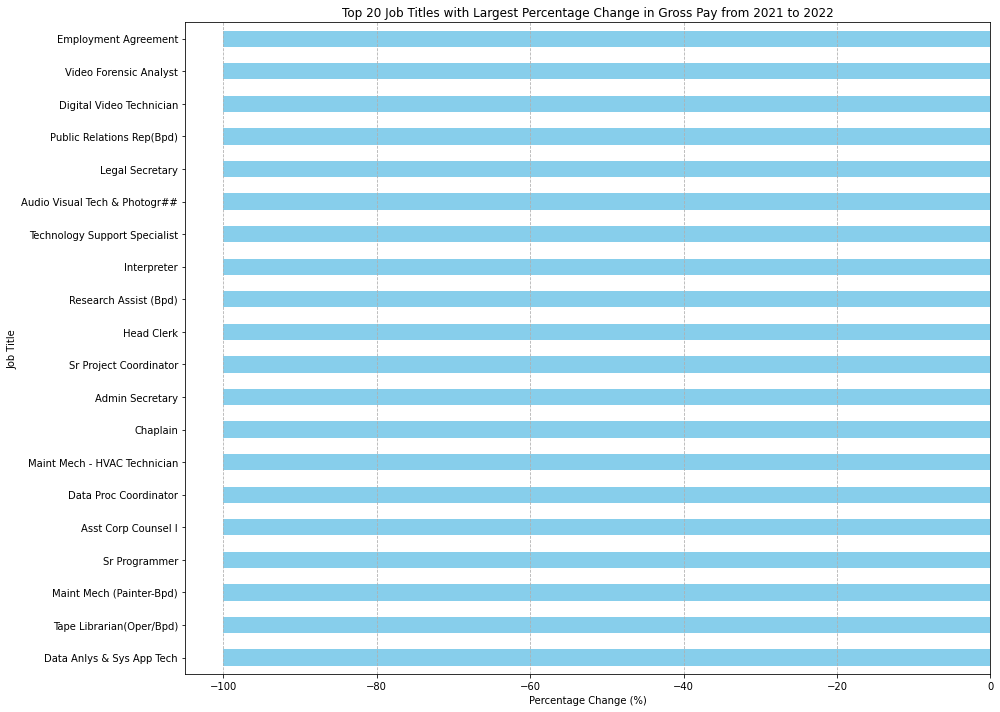

In [11]:
# Remove infinite values for plotting
title_comparison_cleaned = title_comparison_sorted.replace([float('inf'), float('-inf')], float('nan'))

# Get top 20 titles with largest absolute percentage changes
top_20_titles = title_comparison_cleaned.iloc[:20]

# Plotting
plt.figure(figsize=(14, 10))
top_20_titles.plot(x='TITLE', y='Percentage Change (%)', kind='barh', color=['skyblue' if x < 0 else 'lightcoral' for x in top_20_titles['Percentage Change (%)']], legend=False, ax=plt.gca())
plt.gca().invert_yaxis()  # To display the title with the highest change at the top
plt.xlabel('Percentage Change (%)')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles with Largest Percentage Change in Gross Pay from 2021 to 2022')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()

plt.show()

the titles with the red bar chart color represents a positive change (increase in gross pay from 2021 to 2022). this shows that:
- Police lieutenant/Mobile Oper has a outstanding percentage changes in gross pay from 2021 to 2022
    - if the value is around 118% increase in growth from 2021 this means that the 2022 gross pay is 118% higher than the 2021 pay for that position within the BPD.
    - this means that in 2022 BPD has invested more in Police lieutenants and mobile Opers compared to the rest of the faculty outstandingly higher

Answer to devlierable quesiton:

- title 'Police Lieutenant(Det)' sae the largest increase in funds from 2021 to 2022, with an increase of approximately  $1,871,941.95 (31.11%)
- The title "Police Offc Mobile Offc 2$6" had the second-largest increase of around $1,187,961.33 (20.73%).
- On the other hand, some titles, such as "Prin Accountant" and "Video Forensic Analyst", have NaN values for 2022, indicating that these positions may not have been present or funded in 2022.



-----------------------------------------------------

# How has fundings shifted between departments ?

1. Group the data by department for both 2021 and 2022.
2. Calculate the total gross pay for each department in both years.
3. Determine the difference and percentage change in gross pay between the two years for each department.


In [16]:
# earnings_2021['TOTAL_GROSS'] = earnings_2021['TOTAL_GROSS'].str.replace(',', '').astype(float)
# earnings_2022['TOTAL_ GROSS'] = earnings_2022['TOTAL_ GROSS'].str.replace(',', '').astype(float)
# Group by department and sum the gross pay for 2021 and 2022
grouped_department_2021 = earnings_2021.groupby('DEPARTMENT_NAME')['TOTAL_GROSS'].sum()
grouped_department_2022 = earnings_2022.groupby('DEPARTMENT_NAME')['TOTAL_ GROSS'].sum()

# Merge the two series to create a dataframe for comparison
department_comparison = pd.DataFrame({'2021': grouped_department_2021, '2022': grouped_department_2022}).reset_index()

# Calculate the difference and percentage change for each department
department_comparison['Difference'] = department_comparison['2022'] - department_comparison['2021']
department_comparison['Percentage Change (%)'] = (department_comparison['Difference'] / department_comparison['2021']) * 100

# Sort the dataframe by the difference
department_comparison_sorted = department_comparison.sort_values(by='Difference', ascending=False)

department_comparison_sorted.head(10)


,DEPARTMENT_NAME,2021,2022,Difference,Percentage Change (%)
146,Food & Nutrition Svc,3.258181e+06,1.506613e+07,11807947.93,362.409177
115,Boston Fire Department,2.698774e+08,2.780314e+08,8153979.12,3.021364
219,Teaching & Learning,7.084766e+06,1.010673e+07,3021968.07,42.654453
82,BPS New Mission Pilot,5.650549e+06,8.170984e+06,2520434.58,44.605124
121,Chief Academic Officer,7.742732e+05,3.116328e+06,2342055.28,302.484349
203,Parks Department,1.727307e+07,1.943698e+07,2163909.77,12.527650
98,BPS Substitute Teachers/Nurs,1.110052e+07,1.315584e+07,2055315.56,18.515487
231,Unified Student Svc,2.441674e+06,4.225640e+06,1783965.13,73.063186
181,Mayor's Office,3.916976e+06,5.681355e+06,1764378.90,45.044418
19,BPS Blackstone Elementary,8.084120e+06,9.802923e+06,1718803.25,21.261476


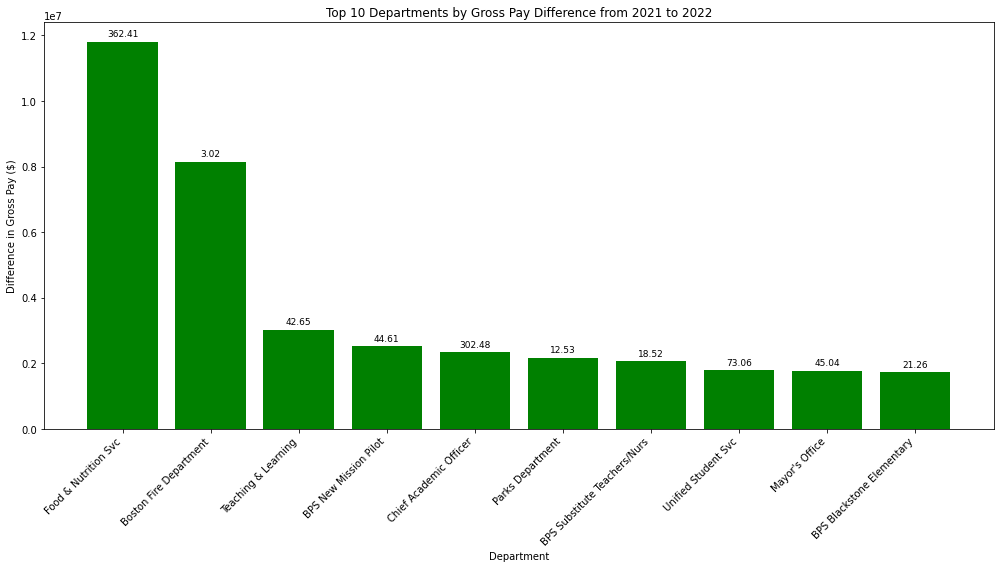

In [17]:
# Selecting top 10 departments based on the absolute difference
top_10_departments = department_comparison_sorted.head(10)

# Plotting
plt.figure(figsize=(14, 8))
colors = ['red' if x < 0 else 'green' for x in top_10_departments['Difference']]
bars = plt.bar(top_10_departments['DEPARTMENT_NAME'], top_10_departments['Difference'], color=colors)
plt.xlabel('Department')
plt.ylabel('Difference in Gross Pay ($)')
plt.title('Top 10 Departments by Gross Pay Difference from 2021 to 2022')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Adding the percentage change on top of the bars
for bar, percentage in zip(bars, top_10_departments['Percentage Change (%)']):
    yval = bar.get_height()
    if yval > 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 100000, round(percentage, 2), ha='center', va='bottom', color='black', fontsize=9)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval - 500000, round(percentage, 2), ha='center', va='top', color='black', fontsize=9)

plt.show()


from the bar chart and the columned tabled, its evident that "Food & Nutrition Service" Department had the highest gross pay increase in absolute terms. in relative terms, it also saw a massive percentage increase of approximately 362.41%. The other departments also saw significant increases, both in absolute and relative terms.



This is how funding has shifted between departments:

- Food & Nutrition Svc: An increase of approximately $11,807,947.93, which represents a 362.41% rise.
- Boston Fire Department: An increase of around $8,153,979.12, marking a 3.02% increase.
- Teaching & Learning: Funding increased by about $3,021,968.07, a 42.65% rise.
- BPS New Mission Pilot: An increase of roughly $2,520,434.58, or 44.61%.
- Chief Academic Officer: A notable increase of around $2,342,055.28, which is a significant 302.48% rise.
- Parks Department: An increase of about $2,163,909.77, or 12.53%.
- BPS Substitute Teachers/Nurs: A rise of approximately $2,055,315.56, marking an 18.52% increase.
- Unified Student Svc: An increase of around $1,783,965.13, or 73.06%.
- Mayor's Office: Funding increased by about $1,764,378.90, a 45.04% rise.
- BPS Blackstone Elementary: An increase of roughly $1,718,803.25, marking a 21.26% rise.


=====================================================

# How have BPD paychecks changed year-over-year? Both the average amount, as compared with non-BPD Boston city employees, and the breakdown (regular pay vs. overtime pay, etc.)?

1. Calculate the average paycheck for BPD employees in 2021 and 2022.
2. Calculate the average paycheck for non-BPD Boston city employees in 2021 and 2022.
3. Compare the average paycheck of BPD employees with that of non-BPD Boston city employees for both years.
4. Analyze the breakdown of pay (regular pay vs. overtime pay, etc.) for BPD employees in both years.

In [18]:
# Calculate the average gross pay for BPD employees in 2021 and 2022
average_gross_BPD_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department']['TOTAL_GROSS'].mean()
average_gross_BPD_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department']['TOTAL_ GROSS'].mean()

average_gross_BPD_2021, average_gross_BPD_2022


(132114.56669360018, 133494.42756908)

The average gross pay for Boston Police Department (BPD) employees is as follows:

2021: $132,114.57
2022: $133,494.43
There's a slight increase in the average paycheck from 2021 to 2022.

-----------------------------------------------------

In [19]:
# Calculate the average gross pay for non-BPD Boston city employees in 2021 and 2022
average_gross_non_BPD_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] != 'Boston Police Department']['TOTAL_GROSS'].mean()
average_gross_non_BPD_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] != 'Boston Police Department']['TOTAL_ GROSS'].mean()

average_gross_non_BPD_2021, average_gross_non_BPD_2022


(74947.61026475347, 75620.02161079121)

The average gross pay for non-Boston Police Department (non-BPD) Boston city employees is:

2021: $74,947.61
2022: $75,620.02
We see a modest increase in the average paycheck for non-BPD employees from 2021 to 2022.



it is evident that BPD employees, on average, earned significantly more tha other city employees in both years.

-----------------------------------------------------

let's analyze the breakdown of pay (regular pay vs. overtime pay, etc.) for BPD employees in both years.​​

In [20]:
# Convert 'REGULAR' and 'OVERTIME' columns to float for both datasets
earnings_2021['REGULAR'] = earnings_2021['REGULAR'].str.replace(',', '').astype(float)
earnings_2021['OVERTIME'] = earnings_2021['OVERTIME'].str.replace(',', '').astype(float)
earnings_2022['REGULAR'] = earnings_2022['REGULAR'].str.replace(',', '').astype(float)
earnings_2022['OVERTIME'] = earnings_2022['OVERTIME'].str.replace(',', '').astype(float)

# Calculate average regular and overtime pay for BPD employees for 2021 and 2022
avg_regular_BPD_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department']['REGULAR'].mean()
avg_overtime_BPD_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department']['OVERTIME'].mean()
avg_regular_BPD_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department']['REGULAR'].mean()
avg_overtime_BPD_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department']['OVERTIME'].mean()

avg_regular_BPD_2021, avg_overtime_BPD_2021, avg_regular_BPD_2022, avg_overtime_BPD_2022


(80373.89986684895, 29005.134550200917, 81791.24897866392, 32247.796666666552)

2021:
Average Regular Pay: $80,373.90
Average Overtime Pay: $29,005.13
2022:
Average Regular Pay: $81,791.25
Average Overtime Pay: $32,247.80

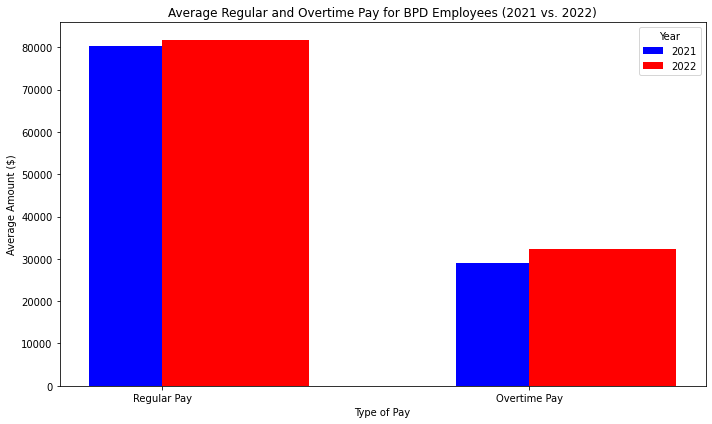

In [21]:
# Plotting the values
labels = ['Regular Pay', 'Overtime Pay']
values_2021 = [avg_regular_BPD_2021, avg_overtime_BPD_2021]
values_2022 = [avg_regular_BPD_2022, avg_overtime_BPD_2022]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, values_2021, width=0.4, label='2021', color='blue', align='center')
plt.bar(x, values_2022, width=0.4, label='2022', color='red', align='edge')

plt.xlabel('Type of Pay')
plt.ylabel('Average Amount ($)')
plt.title('Average Regular and Overtime Pay for BPD Employees (2021 vs. 2022)')
plt.xticks(x, labels)
plt.legend(title='Year')
plt.tight_layout()

plt.show()

Both regular and overtime pays for BPD employees increased from 2021 to 2022. However, the increase in overtime pay was more pronounced than the regular pay.
This could be due to various factors: a change in department policy, increased police activities requiring more overtime, or adjustments in the compensation rates for overtime.
The more substantial increase in overtime pay suggests that, on average, BPD officers either had more opportunities or requirements to work beyond their standard hours in 2022, or there might have been a change in the compensation structure favoring overtime work.

To conclude, while both components of the pay saw an increase, the overtime pay's growth rate was higher, indicating its increasing significance in the overall compensation structure for BPD employees from 2021 to 2022.

# How much BPD officer pay came from injury pay? What percentage of officers took injury pay in a given year?

1. Calculate the total injury pay for BPD officers in 2021 and 2022.
2. Determine the number and percentage of BPD officers who took injury pay in 2021 and 2022.


lets start with the 2021 data:

In [22]:
# Convert 'INJURED' column to float for 2021 dataset
earnings_2021['INJURED'] = earnings_2021['INJURED'].str.replace(',', '').astype(float)

# Calculate the total injury pay for BPD officers in 2021
total_injury_pay_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department']['INJURED'].sum()

# Determine the number of BPD officers who took injury pay in 2021
num_officers_injury_pay_2021 = earnings_2021[(earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department') & 
                                           (earnings_2021['INJURED'] > 0)].shape[0]

# Calculate the percentage of BPD officers who took injury pay in 2021
total_BPD_officers_2021 = earnings_2021[earnings_2021['DEPARTMENT_NAME'] == 'Boston Police Department'].shape[0]
percentage_injury_2021 = (num_officers_injury_pay_2021 / total_BPD_officers_2021) * 100

total_injury_pay_2021, num_officers_injury_pay_2021, percentage_injury_2021


(26994382.02, 646, 20.87912087912088)

For the Boston Police Department (BPD) officers in 2021:

The total injury pay was approximately $26,994,382.02.
646 officers took injury pay.
This represents approximately 20.88% of BPD officers who took injury pay in 2021.

now lets do the 2022 data:

In [23]:
# Convert 'INJURED' column to float for 2022 dataset
earnings_2022['INJURED'] = earnings_2022['INJURED'].str.replace(',', '').astype(float)

# Calculate the total injury pay for BPD officers in 2022
total_injury_pay_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department']['INJURED'].sum()

# Determine the number of BPD officers who took injury pay in 2022
num_officers_injury_pay_2022 = earnings_2022[(earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department') & 
                                           (earnings_2022['INJURED'] > 0)].shape[0]

# Calculate the percentage of BPD officers who took injury pay in 2022
total_BPD_officers_2022 = earnings_2022[earnings_2022['DEPARTMENT_NAME'] == 'Boston Police Department'].shape[0]
percentage_injury_2022 = (num_officers_injury_pay_2022 / total_BPD_officers_2022) * 100

total_injury_pay_2022, num_officers_injury_pay_2022, percentage_injury_2022


(23628467.04, 458, 15.06578947368421)

For the Boston Police Department (BPD) officers in 2022:

The total injury pay was approximately $23,628,467.04.
458 officers took injury pay.
This represents approximately 15.07% of BPD officers who took injury pay in 2022.

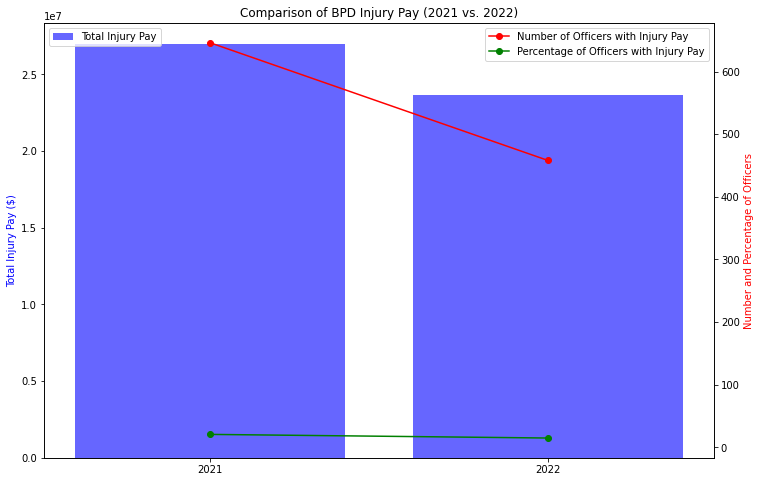

In [24]:
# Variables provided from the previous code snippets
total_injury_pay_2021 = 26994382.02
num_officers_injury_pay_2021 = 646
percentage_injury_2021 = 20.87912087912088

total_injury_pay_2022 = 23628467.04
num_officers_injury_pay_2022 = 458
percentage_injury_2022 = 15.06578947368421

# Data for plotting
years = ['2021', '2022']
total_injury_pay = [total_injury_pay_2021, total_injury_pay_2022]
num_officers_injury_pay = [num_officers_injury_pay_2021, num_officers_injury_pay_2022]
percentage_injury = [percentage_injury_2021, percentage_injury_2022]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Twin the axes
ax2 = ax1.twinx()

# Plot data
ax1.bar(years, total_injury_pay, color='b', alpha=0.6, label='Total Injury Pay')
ax2.plot(years, num_officers_injury_pay, color='r', marker='o', label='Number of Officers with Injury Pay')
ax2.plot(years, percentage_injury, color='g', marker='o', label='Percentage of Officers with Injury Pay')

# Set the y axis label
ax1.set_ylabel('Total Injury Pay ($)', color='b')
ax2.set_ylabel('Number and Percentage of Officers', color='r')

# Set the title
plt.title('Comparison of BPD Injury Pay (2021 vs. 2022)')

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()


Total Injury Pay:
The blue bars represent the total injury pay for BPD officers in each year.
We can observe a decline in the total injury pay from 2021 to 2022. Specifically, the injury pay decreased by more than $3 million, dropping from approximately $26.99 million in 2021 to about $23.63 million in 2022.

Number of Officers with Injury Pay:
The red line (with circle markers) depicts the number of BPD officers who took injury pay in each year.
There's a noticeable drop in the number of officers taking injury pay in 2022 compared to 2021. The number decreased from 646 officers in 2021 to 458 officers in 2022.

Percentage of Officers with Injury Pay:
The green line (with circle markers) illustrates the percentage of BPD officers who took injury pay relative to the total number of officers in the department.
There's a decline in the percentage of officers taking injury pay from 2021 to 2022. The percentage went down from approximately 20.88% in 2021 to about 15.07% in 2022.

to answer the question:

The data suggests a trend of decreasing reliance or occurrence of injury pay within the BPD from 2021 to 2022. Not only did the total amount paid out for injuries decrease, but the number and percentage of officers claiming injury pay also saw a decline.
This could indicate a variety of things, such as improved safety measures, fewer reported injuries, or changes in department policies related to injury claims.
It's essential to delve deeper into the underlying reasons for this decline to understand better and potentially reinforce positive measures or address existing challenges.